# NEMA Photoelectric

- Photoelectric interaction in PETALO

In [1]:
import Pkg

In [2]:
Pkg.add.(["HTTP", "Plots", "DataFrames", "HDF5","DrWatson", "StatsBase", "PhysicalConstants"]);

In [3]:
Pkg.add.(["Test"]);

In [4]:
Pkg.add.(["VegaLite","VegaDatasets"]);

In [5]:
Pkg.add.(["LsqFit","GLM"])

2-element Vector{Nothing}:
 nothing
 nothing

In [861]:
Pkg.add("Distributions") 

In [862]:
using Distributions

In [6]:
using LsqFit
using GLM

In [7]:
using HTTP
using Plots
using VegaLite
using VegaDatasets
using DataFrames
using HDF5
using DrWatson
using Test
using PhysicalConstants
using PhysicalConstants.CODATA2018
using Unitful

In [8]:
using Glob
using CSV

In [9]:
using Statistics
using StatsBase
using Printf

In [10]:
using Logging

In [11]:
@quickactivate "JPetalo"

In [12]:
pwd()

"/Users/jj/JuliaProjects/JPetalo/notebooks"

In [13]:
datadir()

"/Users/jj/JuliaProjects/JPetalo/data"

In [14]:
srcdir()

"/Users/jj/JuliaProjects/JPetalo/src"

In [951]:
include(srcdir("jpetalo.jl"))

Main.JPetalo

In [16]:
import Unitful:
    nm, μm, mm, cm, m, km, inch, ft, mi,
    ac,
    mg, g, kg,
    Ra, °F, °C, K,
    rad, °,
    ns, μs, ms, ps, s, minute, hr, d, yr, Hz,
    eV,
    μJ, mJ, J,
	mW, μW, W,
    A, N, mol, mmol, V, L, mL, μL, M

In [17]:
function loglevel(log)
    if log == "Debug"
        logger = SimpleLogger(stdout, Logging.Debug)
    elseif log =="Info"
        logger = SimpleLogger(stdout, Logging.Info)
    else
        logger = SimpleLogger(stdout, Logging.Warn)
    end
    old_logger = global_logger(logger)
end

loglevel (generic function with 1 method)

# Characterization of PETALO

In [366]:
loglevel("Info")

Base.CoreLogging.SimpleLogger(IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(RawFD(42) open, 0 bytes waiting))), Debug, Dict{Any, Int64}())

### Read a summary data frame with photoelectric interactions

In [844]:
drx = datadir("nema3df")
input = string(drx,"/nemadf_f300_detconf_pde_03_sigmatof_85ps_kmeans_phot.csv")
n3df = DataFrame(CSV.File(input));

In [845]:
println(names(n3df))

["nsipm1", "nsipm2", "q1", "q2", "r1", "r1q", "r2", "r2q", "t1", "t2", "ta1", "ta2", "tr1", "tr2", "trdt", "trmdt", "ux", "uy", "uz", "x1", "x2", "xb1", "xb2", "xr1", "xr2", "xs", "xt1", "xt2", "y1", "y2", "yb1", "yb2", "yr1", "yr2", "ys", "yt1", "yt2", "z1", "z2", "zb1", "zb2", "zr1", "zr2", "zs", "zt1", "zt2"]


## Dependence of energy with radius of interaction
- Histograming the energy deposited in the SiPMs yields a wide and non gaussian distribution
- The reason is that the energy deposited in the SiPMs depends of the radius at which the gamms interacted.
- The relation is roughly linear in a good range of radius, cannot be used for charge too low and saturates for charge too high
- This dependence can be used to define an estimator, "rq" of the radius of interaction

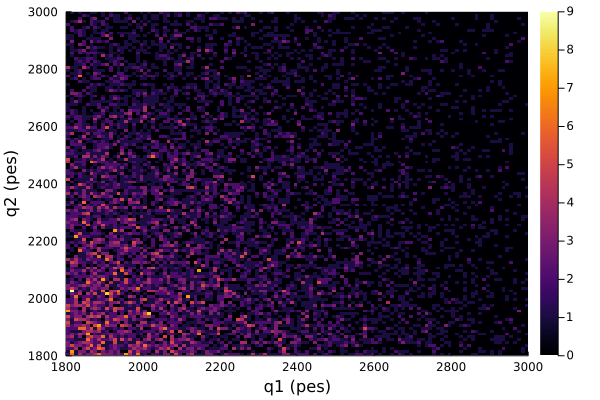

In [837]:
xe,ye,hqr,phqr = JPetalo.hist2d(n3df.q1,n3df.q2, 150, "q1 (pes)", "q2 (pes)", 0., 10000., 0., 10000.)
plot(phqr, legend=false, fmt = :png)

In [846]:
@info names(n3df)

┌ Info: ["nsipm1", "nsipm2", "q1", "q2", "r1", "r1q", "r2", "r2q", "t1", "t2", "ta1", "ta2", "tr1", "tr2", "trdt", "trmdt", "ux", "uy", "uz", "x1", "x2", "xb1", "xb2", "xr1", "xr2", "xs", "xt1", "xt2", "y1", "y2", "yb1", "yb2", "yr1", "yr2", "ys", "yt1", "yt2", "z1", "z2", "zb1", "zb2", "zr1", "zr2", "zs", "zt1", "zt2"]
└ @ Main In[846]:1


### R resolution

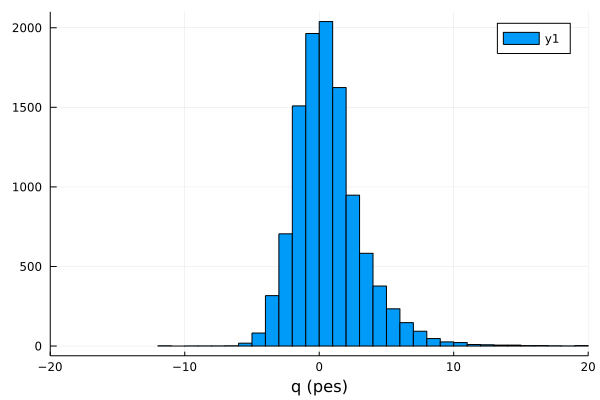

In [838]:
hqc = JPetalo.hist1d(n3df.r1 - n3df.r1q, 50, -20., 20.)
phqc = plot(hqc, xlim=(-20., 20.), xlabel="q (pes)")

In [947]:
fg = JPetalo.fit_gauss(n3df.r1 - n3df.r1q, -5.0, 5.0);

In [956]:
@info fg

┌ Info: Main.JPetalo.FGauss(0.017158065836833485, 1.328498038975369, 8126.399934699517, Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}}
│ edges:
│   -6.5:0.5:6.0
│ weights: [1, 0, 1, 12, 17, 50, 127, 290, 564, 1011, 1539, 2069, 2392, 2404, 2086, 1602, 1046, 583, 295, 108, 48, 14, 9, 0, 2]
│ closed: left
│ isdensity: false, Number[-6.25, -5.75, -5.25, -4.75, -4.25, -3.75, -3.25, -2.75, -2.25, -1.75, -1.25, -0.75, -0.25, 0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25, 5.75], Number[0.03588608160093888, 0.19735747134125886, 0.9420263797903466, 3.9026042927848272, 14.03226998401068, 43.7908431211198, 118.60981883471585, 278.83028266159084, 568.9068935536376, 1007.4521180000253, 1548.4229265358392, 2065.554852889061, 2391.4749324938466, 2403.1279470777995, 2095.896903332439, 1586.5176160501105, 1042.3218506648811, 594.3479189910358, 294.1450955076797, 126.34685537388488, 47.10307110532608, 15.241088023084574, 4.

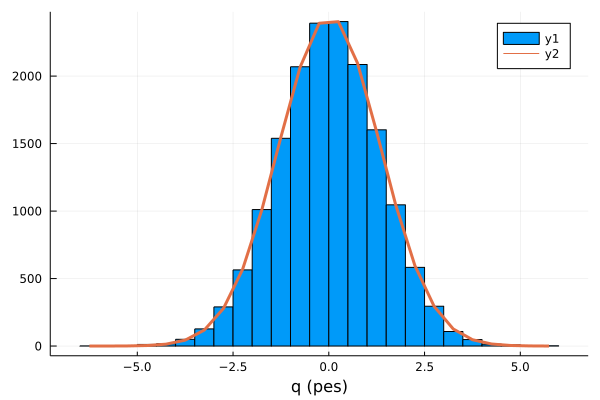

In [957]:
phqc = plot(fg.h, xlabel="q (pes)")
p = plot!(phqc, fg.X, fg.Y, lw=3)

In [958]:
@info " resolution (sigma) = $(fg.std) mm"

┌ Info:  resolution (sigma) = 1.328498038975369 mm
└ @ Main In[958]:1


In [959]:
fg = JPetalo.fit_gauss(hqc);

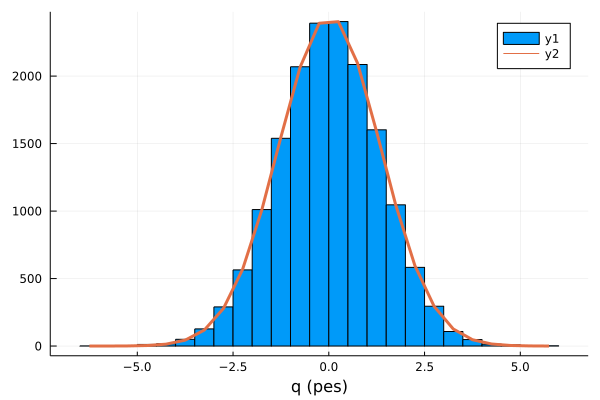

In [960]:
phqc = plot(hqc, xlabel="q (pes)")
p = plot!(phqc, fg.X, fg.Y, lw=3)

In [964]:
@info " resolution (sigma) = $(fg.std) mm, FWHM = $(2.3 * fg.std) mm"

┌ Info:  resolution (sigma) = 1.328498038975369 mm, FWHM = 3.055545489643349 mm
└ @ Main In[964]:1


### Q vs R

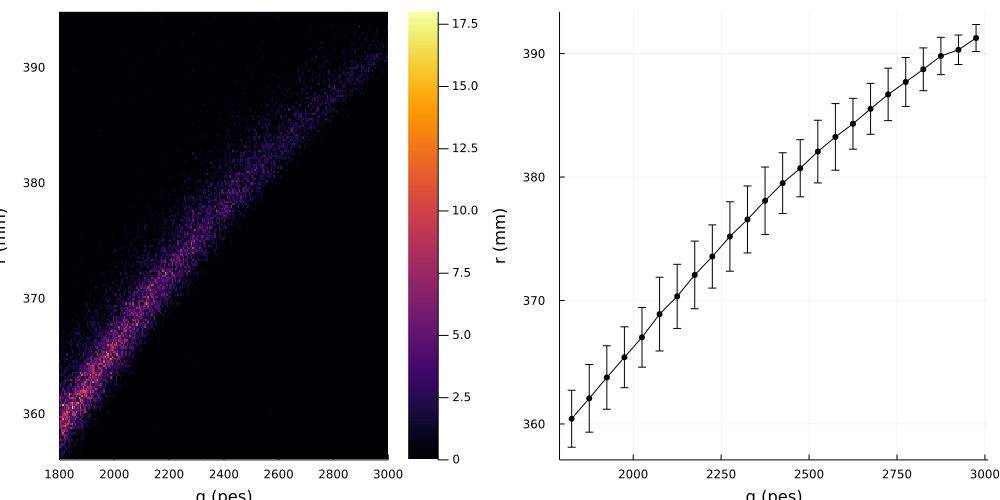

In [965]:
xe,ye,hqr,phqr = JPetalo.hist2d(n3df.q1,n3df.r1, 250, "q (pes)", "r (mm)")
pqrdf = JPetalo.p1df(n3df.q1, n3df.r1, 25)
pp = plot(pqrdf.x_mean,pqrdf.y_mean, yerror=pqrdf.y_std, shape = :circle, color = :black, legend=false)
xlabel!("q (pes)")
ylabel!("r (mm)")
plot(phqr, pp, legend=false, size = (1000, 500), fmt = :png)

In [966]:
function fcqr(df; h=1, qmin=3000.0, qmax=5200.0, bin=5)
    function qr(h)
    if h==1
        return "q1", "r1"
    else
        return "q2", "r2"
    end
end
    qq, rr = qr(h)
    dfq   = JPetalo.select_by_column_value_interval(df, qq, qmin, qmax)
    pqrdf = JPetalo.p1df(dfq[!,qq], dfq[!,rr], bin)
    lfqr, pqr, cqr = JPetalo.lfit(pqrdf);
    return pqrdf, lfqr, pqr, cqr
end

fcqr (generic function with 5 methods)

## Fit in range (1800, 3000) 

### hemisphere 1

In [967]:
pqrdf, lfqr, pqr, cqr = fcqr(n3df, h=1, qmin=1800.0, qmax=3000.0, bin=25);

┌ Info: cqr
│   cqr = [312.337579924, 0.02720877981213627]
└ @ Main In[968]:1


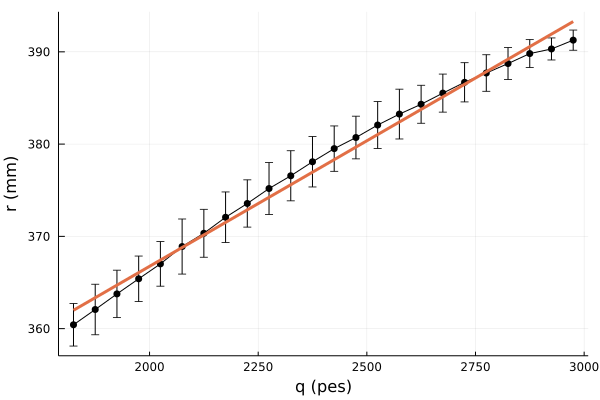

In [968]:
@info "cqr" cqr
pqr = plot(pqrdf.x_mean,pqrdf.y_mean, yerror=pqrdf.y_std, shape = :circle, color = :black, legend=false)
pqr = plot!(pqr,pqrdf.x_mean,lfqr, lw=3, legend=false)
ylabel!("r (mm)")
xlabel!("q (pes)")

### hemisphere 2

┌ Info: cqr
│   cqr = [312.69016909292134, 0.027237807165831823]
└ @ Main In[969]:2


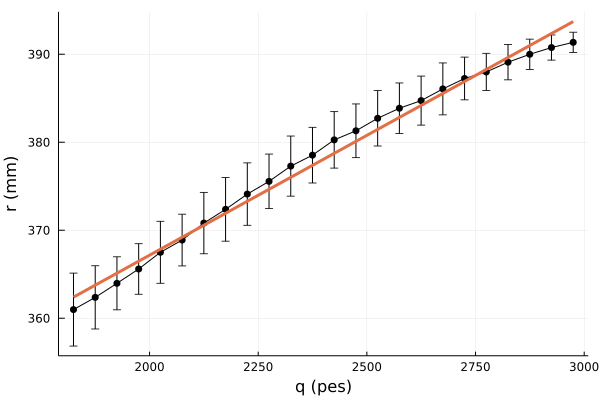

In [969]:
pqrdf, lfqr, pqr, cqr = fcqr(n3df, h=2, qmin=1800.0, qmax=3000.0, bin=25)
@info "cqr" cqr
pqr = plot(pqrdf.x_mean,pqrdf.y_mean, yerror=pqrdf.y_std, shape = :circle, color = :black, legend=false)
pqr = plot!(pqr,pqrdf.x_mean,lfqr, lw=3, legend=false)
ylabel!("r (mm)")
xlabel!("q (pes)")

## Fit function

In [673]:
function rfq(q::Float64)
    return 312.5 + 0.027 * q
end

rfq (generic function with 8 methods)

### Number of SiPMs with charge above threshold

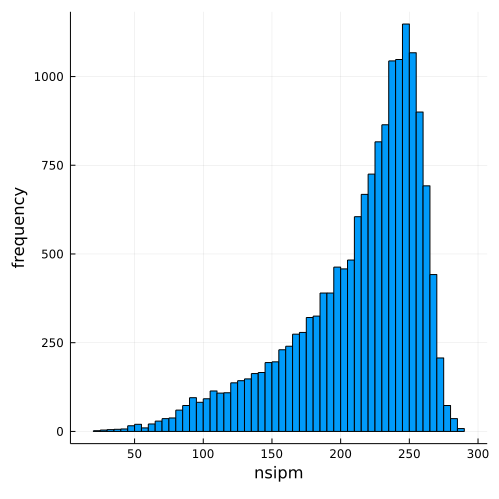

In [970]:
hnsipm, pnsipm = JPetalo.hist1d(n3df.nsipm1,  "nsipm", 50);
plot(pnsipm,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png)

## Resolution in (x,y,z,r) intrinsic

In [971]:
hxtxr, pxtxr = JPetalo.hist1d(n3df.xt1 - n3df.x1, "xt - xr", 50,  -5., 5.);
plot(pxtxr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);

In [972]:
hytyr, pytyr = JPetalo.hist1d(n3df.yt1 - n3df.y1, "yt - yr", 50,  -5., 5.);
plot(pytyr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);

In [973]:
hztzr, pztzr = JPetalo.hist1d(n3df.zt1 - n3df.z1, "zt - zr", 50,  -5., 5.);
plot(pztzr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);

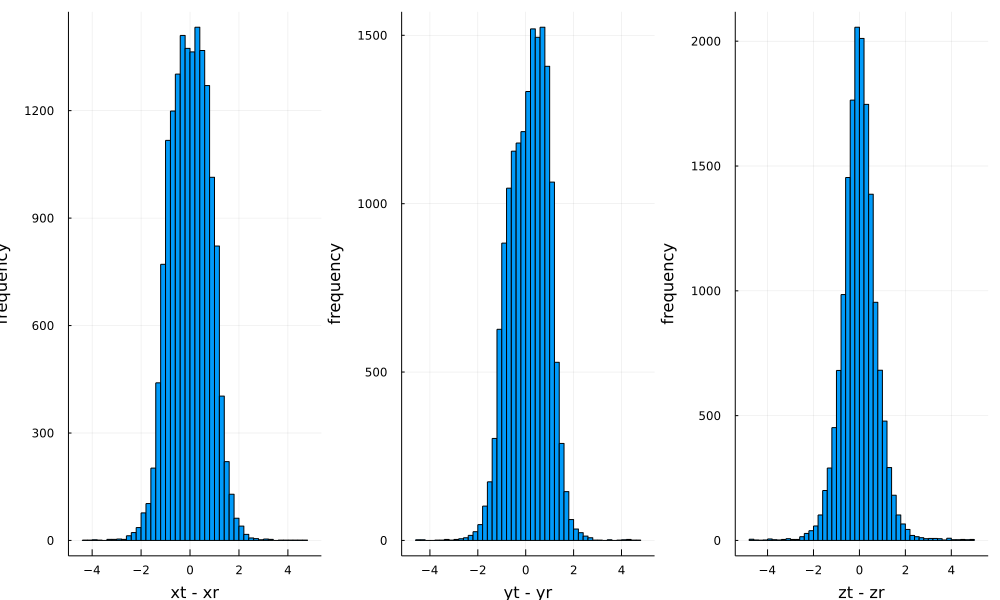

In [974]:
plot(pxtxr, pytyr,pztzr, layout = (1, 3), size = (1000, 600), 
     legend=false, fmt = :png)

In [975]:
xmu, xstd = JPetalo.mean_std(n3df.xt1 - n3df.x1, -2.0, 2.0)
@printf "Resolution in x (mm) = %5.1f" xstd

Resolution in x (mm) =   0.8

In [976]:
xmu, xstd = JPetalo.mean_std(n3df.yt1 - n3df.y1, -2.0, 2.0)
@printf "Resolution in y (mm) = %5.1f" xstd

Resolution in y (mm) =   0.8

In [977]:
xmu, xstd = JPetalo.mean_std(n3df.zt1 - n3df.zr1, -2.0, 2.0)
@printf "Resolution in y (mm) = %5.1f" xstd

Resolution in y (mm) =   0.7

In [981]:
fg = JPetalo.fit_gauss(hxtxr);

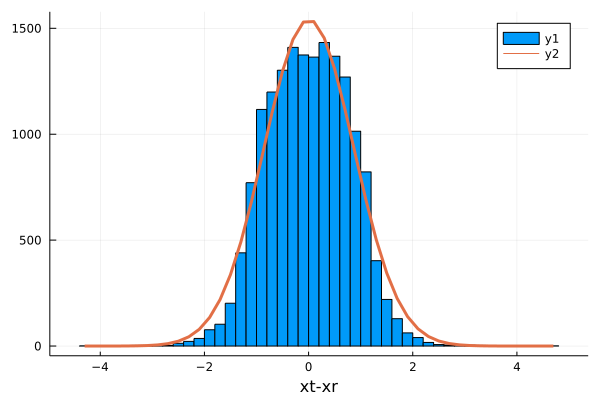

In [982]:
phqc = plot(hxtxr, xlabel="xt-xr")
p = plot!(phqc, fg.X, fg.Y, lw=3)

In [983]:
@info " resolution (sigma) = $(fg.std) mm, FWHM = $(2.3 * fg.std) mm"

┌ Info:  resolution (sigma) = 0.8637214333106141 mm, FWHM = 1.9865592966144123 mm
└ @ Main In[983]:1


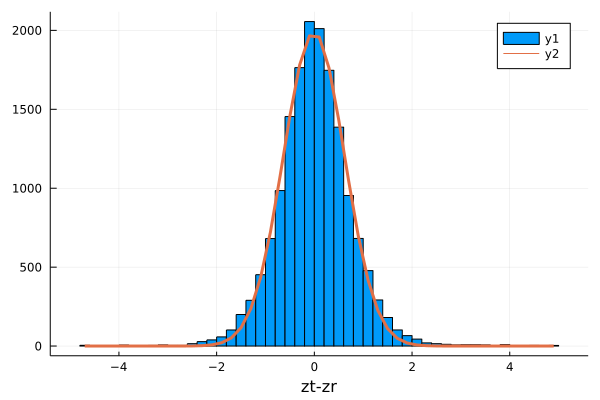

In [986]:
fg = JPetalo.fit_gauss(hztzr);
phqc = plot(hztzr, xlabel="zt-zr")
p = plot!(phqc, fg.X, fg.Y, lw=3)

In [987]:
@info " resolution (sigma) = $(fg.std) mm, FWHM = $(2.3 * fg.std) mm"

┌ Info:  resolution (sigma) = 0.6266320100210018 mm, FWHM = 1.441253623048304 mm
└ @ Main In[987]:1


## Resolution in xyz (r from q)

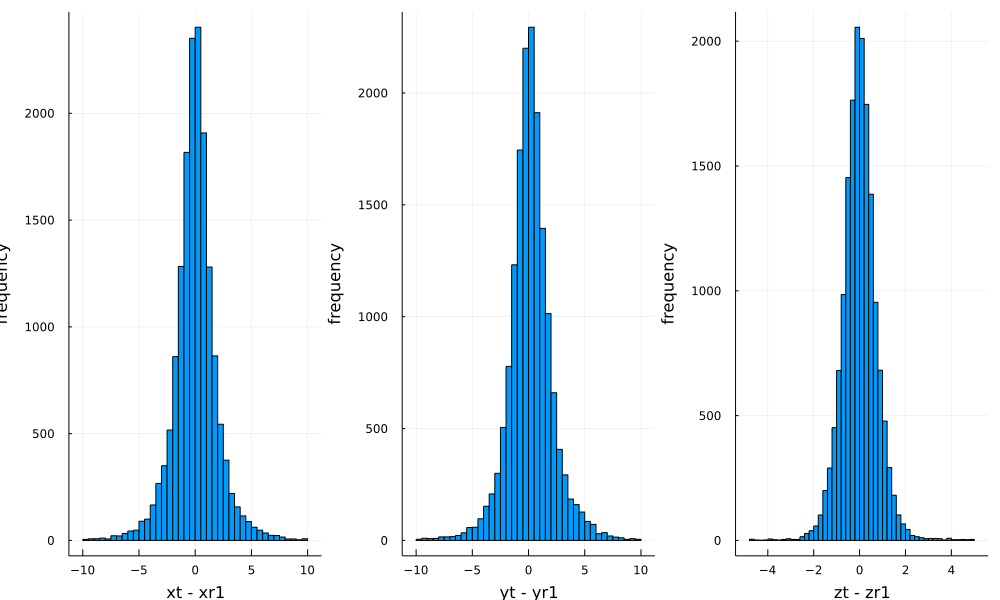

In [990]:
hxtxr, pxtxr = JPetalo.hist1d(n3df.xt1 - n3df.xr1, "xt - xr1", 50,  -10., 10.);
plot(pxtxr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);
hytyr, pytyr = JPetalo.hist1d(n3df.yt1 - n3df.yr1, "yt - yr1", 50,  -10., 10.);
plot(pytyr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);
hztzr, pztzr = JPetalo.hist1d(n3df.zt1 - n3df.zr1, "zt - zr1", 50,  -5., 5.);
plot(pztzr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);
plot(pxtxr, pytyr,pztzr, layout = (1, 3), size = (1000, 600), 
     legend=false, fmt = :png)

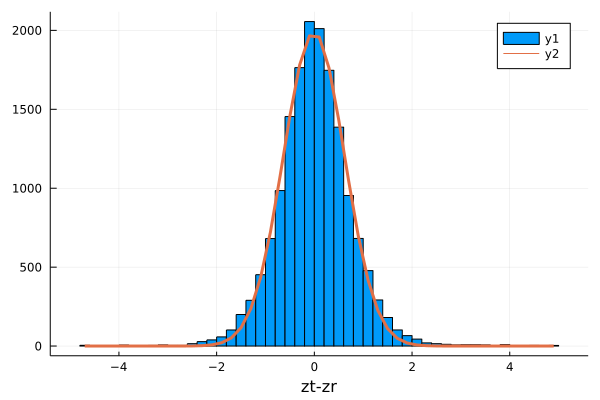

In [991]:
fg = JPetalo.fit_gauss(hztzr);
phqc = plot(hztzr, xlabel="zt-zr")
p = plot!(phqc, fg.X, fg.Y, lw=3)

In [992]:
@info " resolution (sigma) = $(fg.std) mm, FWHM = $(2.3 * fg.std) mm"

┌ Info:  resolution (sigma) = 0.6266320100210018 mm, FWHM = 1.441253623048304 mm
└ @ Main In[992]:1


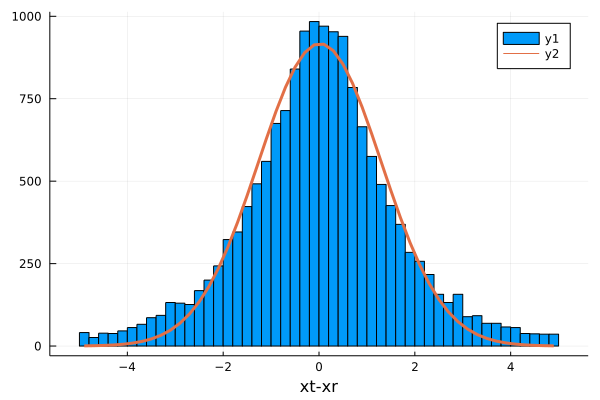

In [994]:
fg = JPetalo.fit_gauss(n3df.xt1 - n3df.xr1, -5.0,5.0);
phqc = plot(fg.h, xlabel="xt-xr")
p = plot!(phqc, fg.X, fg.Y, lw=3)

In [995]:
@info " resolution (sigma) = $(fg.std) mm, FWHM = $(2.3 * fg.std) mm"

┌ Info:  resolution (sigma) = 1.284491631080955 mm, FWHM = 2.9543307514861965 mm
└ @ Main In[995]:1


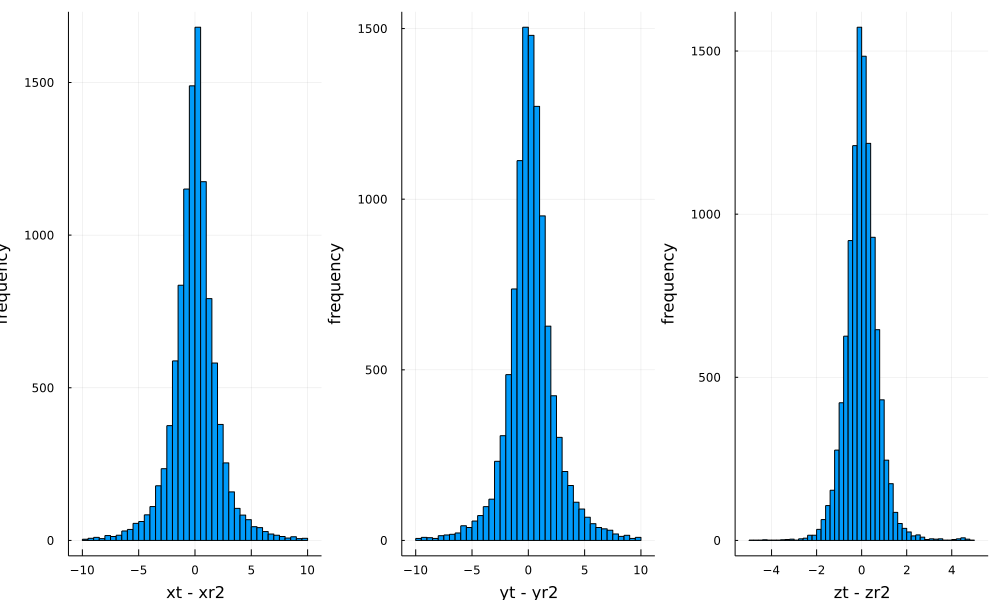

In [751]:
hxtxr, pxtxr = JPetalo.hist1d(n3df.xt2 - n3df.xr2, "xt - xr2", 50,  -10., 10.);
plot(pxtxr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);
hytyr, pytyr = JPetalo.hist1d(n3df.yt2 - n3df.yr2, "yt - yr2", 50,  -10., 10.);
plot(pytyr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);
hztzr, pztzr = JPetalo.hist1d(n3df.zt2 - n3df.zr2, "zt - zr2", 50,  -5., 5.);
plot(pztzr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);
plot(pxtxr, pytyr,pztzr, layout = (1, 3), size = (1000, 600), 
     legend=false, fmt = :png)

In [754]:
n3dfx = JPetalo.select_by_column_value(n3df, "xs", 0.0);

In [755]:
n3dfxy = JPetalo.select_by_column_value(n3dfx, "ys", 10.0);

In [756]:
n3dfxyz = JPetalo.select_by_column_value(n3dfxy, "zs", 0.0);

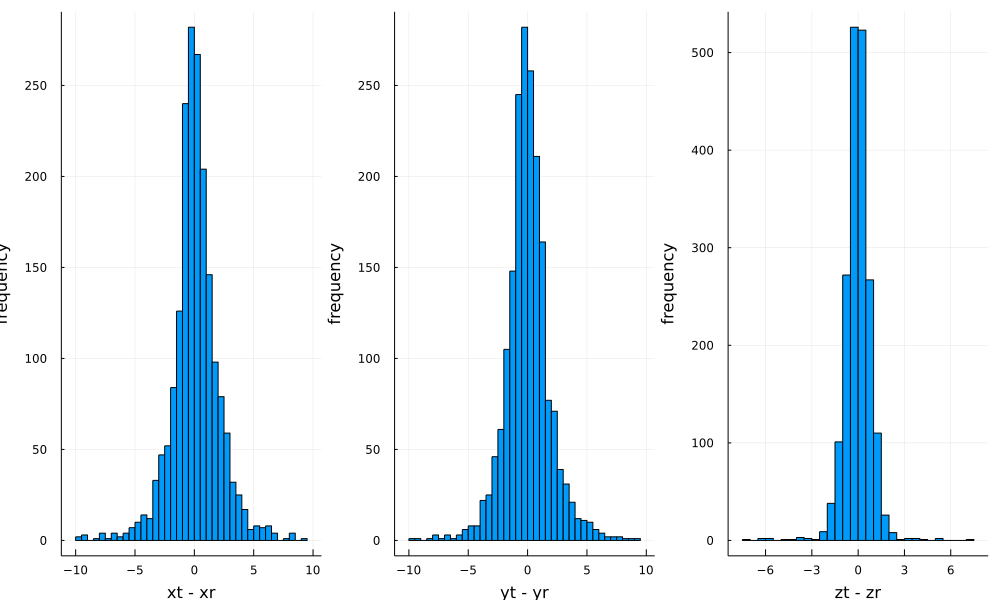

In [757]:
hx, px = JPetalo.hist1d(n3dfxyz.xt1 - n3dfxyz.xr1, "xt - xr", 50,  -10., 10.)
hy, py = JPetalo.hist1d(n3dfxyz.yt1 - n3dfxyz.yr1, "yt - yr", 50,  -10., 10.)
hz, pz = JPetalo.hist1d(n3dfxyz.zt1 - n3dfxyz.zr1, "zt - zr", 50,  -10., 10.)
plot(px, py, pz, layout = (1, 3), size = (1000, 600), legend=false, fmt = :png)

In [712]:
xmu, xstd = JPetalo.mean_std(n3dfxyz.xt1 - n3dfxyz.xr1, -5., 5.)
@printf "Resolution in x (mm) = %5.1f" xstd

Resolution in x (mm) =   3.0

## TOF

In [996]:
function ct12(df; reco=true)
    if reco
        return 1000.0*(df.tr1 - df.tr2)
    else
        return 1000.0 * (df.t1 - df.t2)
    end
end
        


ct12 (generic function with 1 method)

In [997]:
t12 = ct12(n3df, reco=true);

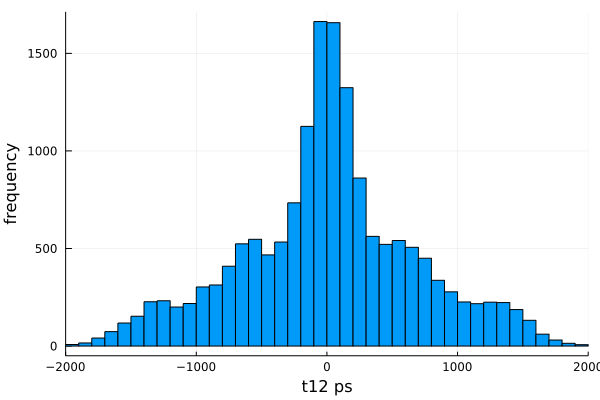

In [998]:
ht1t2, pt1t2 = JPetalo.hist1d(t12, "t12 ps", 50,  -2000., 2000.)
plot(pt1t2, xlimit=(-2000.0,2000.0), legend=false)

In [999]:
xmu, xstd = JPetalo.mean_std(t12, -200.0, 200.0)

(5.000943005199307, 106.16894746410428)

In [1000]:
c0 =uconvert(mm/ns, float(SpeedOfLightInVacuum))

299.792458 mm ns⁻¹

In [1001]:
cc = convert(Float32, c0/(mm*ns^-1))

299.79245f0

In [1002]:
function ctsr(df; reco=true)
    if reco
        tsr1 = [JPetalo.dxyz([df.xr1[i], df.yr1[i], df.zr1[i]], 
                             [df.xs[i], df.ys[i], df.zs[i]]) for i in 1:nrow(df)]/cc
        tsr2 = [JPetalo.dxyz([df.xr2[i], df.yr2[i], df.zr2[i]], 
                             [df.xs[i], df.ys[i], df.zs[i]]) for i in 1:nrow(df)]/cc
        
    else
        tsr1 = [JPetalo.dxyz([df.x1[i], df.y1[i], df.z1[i]], 
                             [df.xs[i], df.ys[i], df.zs[i]]) for i in 1:nrow(df)]/cc
        tsr2 = [JPetalo.dxyz([df.x2[i], df.y2[i], df.z2[i]], 
                             [df.xs[i], df.ys[i], df.zs[i]]) for i in 1:nrow(df)]/cc
    end
    return 1000.0*(tsr1 - tsr2)
end

ctsr (generic function with 1 method)

In [1003]:
tsr12 = ctsr(n3df, reco=true);

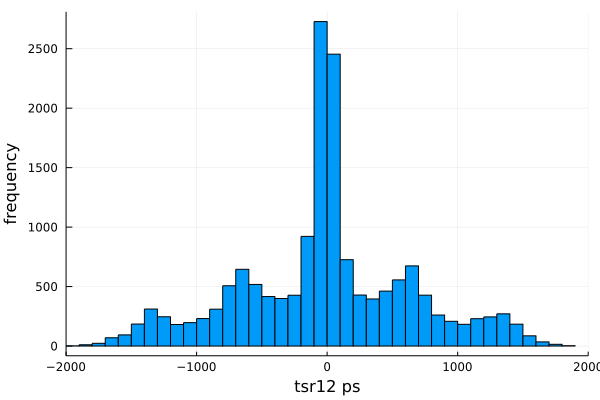

In [1004]:
htsr12, psr1t2 = JPetalo.hist1d(tsr12, "tsr12 ps", 50,  -2000., 2000.)
plot(psr1t2, xlimit=(-2000.0,2000.0),legend=false) 

In [1005]:
xmu, xstd = JPetalo.mean_std(tsr12, -200.0, 200.0)

(-6.434376480491071, 83.28077445587485)

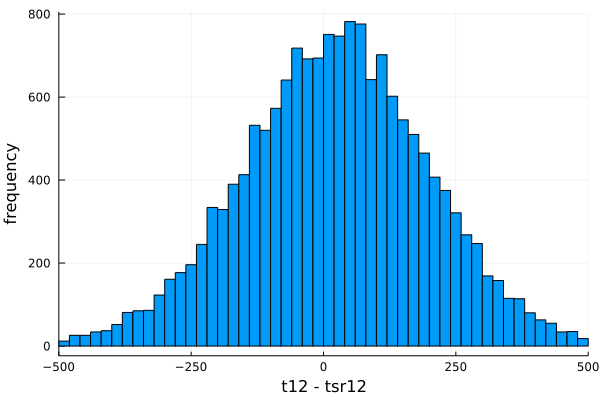

In [1006]:
h12, p12 = JPetalo.hist1d(t12-tsr12, "t12 - tsr12", 50,  -500., 500.)
plot(p12, xlimit=(-500.0,500.0),legend=false) 

In [1007]:
xmu, xstd = JPetalo.mean_std(t12-tsr12, -500.0, 500.0)

(21.288184470319713, 172.60655672168693)

In [1008]:
function crb(df; reco=true)
    clxe = cc/1.6
    if reco
        trb1 = [JPetalo.dxyz([df.xr1[i], df.yr1[i], df.zr1[i]], 
                             [df.xb1[i], df.yb1[i], df.zb1[i]]) for i in 1:nrow(df)]/clxe;
        trb2 = [JPetalo.dxyz([df.xr2[i], df.yr2[i], df.zr2[i]], 
                             [df.xb2[i], df.yb2[i], df.zb2[i]]) for i in 1:nrow(df)]/clxe;
        
    else
        trb1 = [JPetalo.dxyz([df.x1[i], df.y1[i], df.z1[i]], 
                             [df.xb1[i], df.yb1[i], df.zb1[i]]) for i in 1:nrow(df)]/clxe;
        trb2 = [JPetalo.dxyz([df.x2[i], df.y2[i], df.z2[i]], 
                             [df.xb2[i], df.yb2[i], df.zb2[i]]) for i in 1:nrow(df)]/clxe;
     end
    return 1000.0*(trb1 - trb2)
end

crb (generic function with 1 method)

In [1009]:
trb12 = crb(n3df, reco=true);

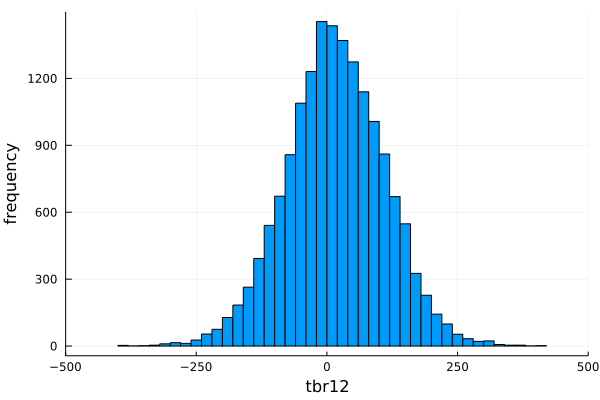

In [1010]:
htrb12, ptrb12 = JPetalo.hist1d(trb12, "tbr12", 50,  -500., 500.)
plot(ptrb12, xlimit=(-500.0,500.0), legend=false) 

In [1011]:
xmu, xstd = JPetalo.mean_std(trb12, -200.0, 200.0)

(14.04474498075469, 83.47481512844878)

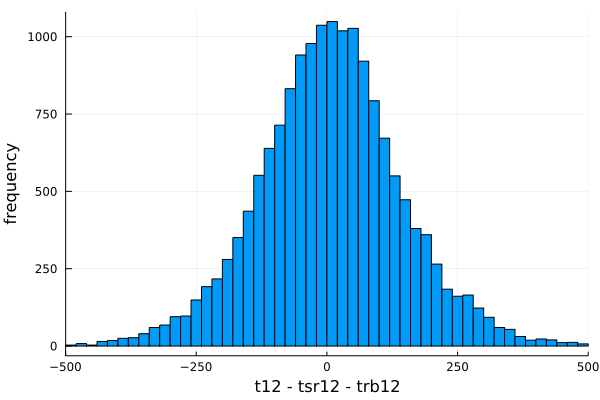

In [1012]:
h12, p12 = JPetalo.hist1d(t12 - tsr12 - trb12  , "t12 - tsr12 - trb12", 75,  -500., 500.)
p12 = plot(p12, xlimit=(-500.0,500.0), legend=false) 

In [1013]:
xmu, xstd = JPetalo.mean_std(trb12, -250.0, 250.0)

(15.36001303681513, 89.28430940396007)

In [1014]:
function gfit_gauss(x, xmin, xmax, bins=50)
    function gausx(x, μ, σ, N)
        return N * exp(-(x - μ)^2/(2*σ^2))
    end
    
    xmu, xstd = JPetalo.mean_std(x, xmin, xmax)
    @debug xmu xstd
    
    h = JPetalo.hist1d(x,  bins, xmin, xmax)
    edges = collect(h.edges[1])
    w = h.weights
    c =[0.5 *(edges[i] + edges[i+1]) for i in 1:length(edges)-1]
    @debug "histo" edges w c 

    @. gauss1(x, p) = p[1]* exp(-(x - xmu)^2/(2*xstd^2))
    p0 = [1.0]
    fq = curve_fit(gauss1, c, w, p0)    
    NN =coef(fq)[1][1]
    @debug "gauss1" NN
     
    @. gauss3(x, p) = p[1]* exp(-(x - p[2])^2/(2*p[3]^2))
    p0 = [NN, xmu, xstd]
    fq = curve_fit(gauss3, c, w, p0)
    cfq = coef(fq)
    @debug "coef(fq)" cfq
    NN = cfq[1]
    mu =cfq[2]
    std  =cfq[3]
    @debug "gauss3" NN mu std
  
    return xmu, xstd, mu, std, NN, c, gausx.(c, (mu,), (std,), (NN),)    
end

gfit_gauss (generic function with 2 methods)

In [1015]:
xmu, xstd, mu, std, NN, xg, yg = gfit_gauss(t12 - tsr12 - trb12, -500.0, 500.0, 50)

(6.772233437271605, 136.15838130101565, 5.8050622663976945, 122.81221525975131, 1024.891811314791, [-490.0, -470.0, -450.0, -430.0, -410.0, -390.0, -370.0, -350.0, -330.0, -310.0  …  310.0, 330.0, 350.0, 370.0, 390.0, 410.0, 430.0, 450.0, 470.0, 490.0], [0.2961937342451801, 0.5640800739267172, 1.0461358177564883, 1.889373443413806, 3.322997108535112, 5.691471189488452, 9.492957616896282, 15.419168830799673, 24.38949495743807, 37.568778312651006  …  47.693640532492026, 31.442873951196503, 20.186750577892166, 12.620978330734157, 7.68425992758623, 4.556102588300421, 2.6306760056898133, 1.4791889525565984, 0.8099577537763456, 0.4319002960361414])

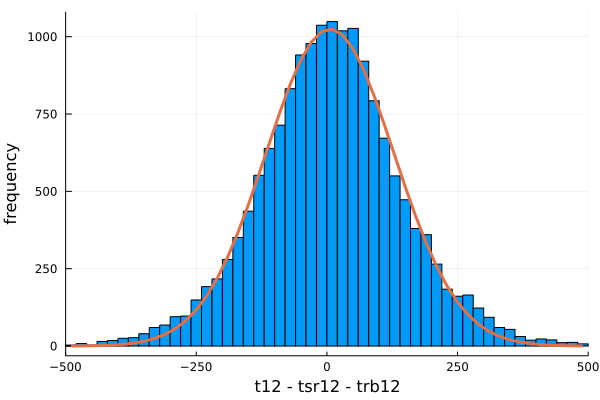

In [1016]:
p12 = plot!(p12, xg, yg, lw=3, xlimit=(-500.0,500.0), legend=false) 

In [1017]:
@info "TOF resolution = $std ps: FWHM = $(2.3 * std) ps" 

┌ Info: TOF resolution = 122.81221525975131 ps: FWHM = 282.468095097428 ps
└ @ Main In[1017]:1


In [582]:
xmu, xstd, mu, std, NN, xg, yg = JPetalo.fit_gauss(t12 - tsr12 - trb12, -100.0, 100.0, 50)

(-1.6892970924405932, 24.44586024974722, -1.9176580293233148, 17.51611947689116, 1691.2616767223615, [-97.5, -92.5, -87.5, -82.5, -77.5, -72.5, -67.5, -62.5, -57.5, -52.5  …  52.5, 57.5, 62.5, 67.5, 72.5, 77.5, 82.5, 87.5, 92.5, 97.5], [0.0005784133567832617, 0.0026364924096051977, 0.011077132442556287, 0.0428983691552597, 0.15313230749328638, 0.5038548951393932, 1.5281174973365652, 4.271895552060645, 11.007713398659426, 26.144853480300466  …  13.563456727078952, 5.3645947840535815, 1.9557623019204589, 0.6572155480295411, 0.20356926026639094, 0.058120478164669476, 0.015295327118575475, 0.0037102311848758248, 0.0008295752450439349, 0.00017097129744928397])

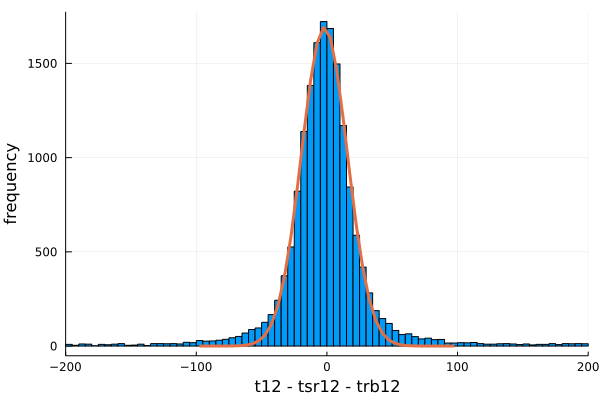

In [583]:
h12, p12 = JPetalo.hist1d(t12 - tsr12 - trb12  , "t12 - tsr12 - trb12", 75,  -200., 200.)
p12 = plot(p12, xlimit=(-200.0,200.0), legend=false) 
p12 = plot!(p12, xg, yg, lw=3, xlimit=(-200.0,200.0), legend=false) 